# Engineering flight simulations with JSBSim

<a href="http://jsbsim.sourceforge.net/">JSBSim</a> is an open source flight dynamics model (FDM) that compiles and runs under many operating systems (including Microsoft Windows, Apple Macintosh, Linux, etc.). The FDM is essentially the physics/math model that defines the movement of an aircraft in the atmosphere around the Earth (or of a rocket, etc.) , under the forces and moments applied to it using the various control mechanisms and from the forces of nature. 

# What is JSBSim

From an application programming perspective, JSBSim is a *library*, i.e. a collection of program code mostly written in the C++ programming language. Some of the C++ classes that comprise JSBSim are meant to model physical entities such as the atmosphere, a flight control system, or an engine. Some of the classes encapsulate concepts or mathematical constructs such as the equations of motion, a matrix, quaternion, or vector. Some classes manage collections of other objects. 

From an end-user perspective, JSBSim can be viewed as sort of a 'black box' which is supplied with input files in XML format. These XML files contain descriptions of an aerospace vehicle, engines, scripts, and so on. When these files are loaded into JSBSim,  they direct it  to model the flight of that vehicle in real-time as part of a larger simulation framework (such as FlightGear or OpenEaagles), or faster than real-time in a batch mode. Each run of JSBSim would result in data files showing performance and dynamics of the vehicle being simulated and studied.

## Flight simulations in mathematical terms

In mathematical terms, the aircraft under study can be viewed as a dynamical system evolving in time $t$, whose state variable is the vector $\mathbf{x}(t)$, subject to a set of inputs $\mathbf{u}(t)$. We are interested in solving the state propagation problem

\begin{equation}
\left\{
  \begin{array}{l}
  \dot{\mathbf{x}} = \mathbf{f}\big( \mathbf{x}, \mathbf{u} \big)
  \\
  \mathbf{x}(0) = \mathbf{x}_0 \;\;\; \text{and} \;\; \mathbf{u} = \mathbf{g}_{u}(t) \;\; \text{for} \;\; 0 \le t \le t_{\mathrm{fin}}
  \end{array}
\right.
\end{equation}

where $\mathbf{f}$ is a vector valued function representing the aircraft 6DoF equations of motion and can incorporate state propagation models of its subsystems (e.g. the engine, the propulsion device, the flight control system actuators, etc.). In the above initial value problem the initial state $\mathbf{x}_0$ is assigned and the inputs are known at each time $t$, i.e. the values of the function $\mathbf{g}_{u}(t)$ are determined.

Typically the state variable vector is the following

\begin{equation}
  \mathbf{x} = \big[\,u,\, v,\, w,\, p,\, q,\, r,\, \lambda,\, \mu,\, h_{\mathrm{SL}},\, q_0,\, q_1,\, q_2,\, q_3\, \big]^{\mathrm{T}}
\end{equation}

where
  - $u$, $v$, $w$ are the vehicle's center of mass velocity components in body axes,
  - $p$, $q$, $r$ are the vehicle angular velocity components in body axes,
  - $\lambda$, $\mu$ are the (vehicle's center of mass geodetic) latitude and longitude,
  - $h_{\mathrm{SL}}$ are the (vehicle's center of mass) altitude above the standard Sea Level,
  - $q_0$, $q_1$, $q_2$, $q_3$ are the vehicle's quaternion components with respect to a Earth-fixed (or inertial) reference frame (hese are related to the aircraft Euler angles $\psi$, $\theta$, $\phi$).

(see one of the many flight dynamics textbooks)

For a conventional aircraft the inputs are typically

\begin{equation}
  \mathbf{u} = \big[\,\delta_{\mathrm{a}},\, \delta_{\mathrm{e}},\, \delta_{\mathrm{r}},\, \delta_{\mathrm{T}}\, \big]^{\mathrm{T}}
\end{equation}

where
  - $\delta_{\mathrm{a}}$ is the (right) aileron deflection angle ,
  - $\delta_{\mathrm{e}}$ is the elevator deflection angle,
  - $\delta_{\mathrm{r}}$ is the rudder deflection angle,
  - $\delta_{\mathrm{T}}$ is the throttle setting.

When the input laws are completely known before solving the propagation problem — e.g. for a conventional aircraft the functions $\delta_{\mathrm{a}}(t)$, $\delta_{\mathrm{e}}(t)$, $\delta_{\mathrm{r}}(t)$, and $\delta_{\mathrm{T}}(t)$ are pre-determined — someone calls it a 'pre-cooked' simulation. But more intricate situations can be handled when $\mathbf{g}_{u}(t)$ *are not* known *a priori* but are determined at runtime by some event-based control logic. This scenario can be studied with JSBSim as it can model autopilots and several types of flight controls.

## Batch simulations with JSBSim

JSBSim has no native graphics. It can be run by itself as a standalone program, taking input from a script file and a given vehicle configuration files. The JSBSim library distribution comes with an application — `JSBSim.exe` on Windows — that can be executed from the console as an engineering flight simulation tool. The standalone application takes control inputs, calculates and sums the forces and moments that result from those control inputs and the environment, and advances the state of the vehicle (velocity, orientation, position, etc.) in discrete time steps.

This is what we are going to do in the following sections. The simulation results, i.e. the time histories of several variables of interest, will be saved on file and successively will be post-processed and analyzed.

##### Interlude — setup our Python tools first


*We are going to use Python 3.5 and several related packages/libraries to process the data and produce plots. This is a Jupyter notebook and all external commands are executed in code cells by prepending the character `!` as if they were issued in a regular prompt.*

In [1]:
# Set up the notebook and import required Python packages
%run ./python/init.py
%matplotlib inline

## Setting up JSBSim

To compile and set up JSBSim please refer to these documents: <a href="http://jsbsim.sourceforge.net/JSBSimReferenceManual.pdf">JSBSim Reference Manual (first draft version by Jon S. Berndt)</a>, and <a href="https://www.dropbox.com/s/x3mugy8s1w5e0ru/JSBSimReferenceManual.pdf?dl=0">JSBSim Reference Manual (revised draft version by Jon S. Berndt and Agostino De Marco)</a>.

From now on we assume that we will be running JSBSim in Windows from the command prompt. This means we will execute the program `JSBSim.exe`. Before we get to run our full blown simulations, let us execute JSBSim with no inputs:

In [2]:
!JSBSim.exe


  JSBSim version 1.0 Apr  6 2016 11:27:59

  Usage: jsbsim [script file name] [output file names] <options>

  options:
    --help  returns this message
    --version  returns the version number
    --outputlogfile=<filename>  sets (overrides) the name of a data output file
    --logdirectivefile=<filename>  specifies the name of a data logging directives file
                                   (can appear multiple times)
    --root=<path>  specifies the JSBSim root directory (where aircraft/, engine/, etc. reside)
    --aircraft=<filename>  specifies the name of the aircraft to be modeled
    --script=<filename>  specifies a script to run
    --realtime  specifies to run in actual real world time
    --nice  specifies to run at lower CPU usage
    --nohighlight  specifies that console output should be pure text only (no color)
    --suspend  specifies to suspend the simulation after initialization
    --initfile=<filename>  specifies an initilization file
    --catalog specifies that

The outcome of the JSBSim basic execution is the standard help message, suggesting the list of command line options to the user.

From now on we assume that `JSBSim.exe` resides at the root of a standard directory tree — which we will call `⟨JSBSim root⟩` — containing all the necessary files to run the simulations for a given aircraft FDM.

## Simulating a Cessna 172 ( FDM `c172x`)

We want to simulate some flight manoeuvers of a Cessna 172. The FDM of this particular aircraft comes in various flavors with the standard JSBSim distribution. We will use the FDM named `c172x` which includes additional autopilot functions.

### File structure

To run the simulations discussed further below you have to check that the following directory and file structure is in place at some location `⟨JSBSim root⟩` of your hard disk:

```⟨JSBSim root⟩
│   JSBSim.exe
│   ...
│
└───scripts
│   │   c172_elevator_doublet.xml
│   │   ...
│
└───aircraft
│   │
│   └───c172x
│       │   c172x.xml
│       │   c172ap.xml
│       │   elevator_doublet_init.xml
│       │   ...
│
└───engine
│   │   eng_io320.xml
│   │   prop_75in2f.xml
│   │   ...
│
└───systems
│   │   GNCUtilities.xml
│   │   Autopilot.xml
│   │   ...
│
│   ...
```

### Property catalog

To check all the internal properties defined by the FDM named `c172x` you can give the command:

In [3]:
!JSBSim.exe --aircraft=c172x --catalog > catalog_c172x.txt


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


This will create a text file with the catalog of all available variables as follows:

In [4]:
# Display catalog file content
show_file_contents('catalog_c172x.txt', head=20, tail=20)



     JSBSim Flight Dynamics Model v1.0 Apr  6 2016 11:27:59
            [JSBSim-ML v2.0]

JSBSim startup beginning ...


  Property Catalog for c172x

    inertial/sea-level-radius_ft (R)
    velocities/h-dot-fps (R)
    velocities/v-north-fps (R)
    velocities/v-east-fps (R)
    velocities/v-down-fps (R)
    velocities/u-fps (R)
    velocities/v-fps (R)
    velocities/w-fps (R)
    velocities/p-rad_sec (R)
    velocities/q-rad_sec (R)
    velocities/r-rad_sec (R)
    velocities/pi-
	...
	...

    ap/altitude_hold (RW)
    ap/heading_hold (RW)
    ap/altitude_setpoint (RW)
    ap/heading_setpoint (RW)
    ap/aileron_cmd (RW)
    ap/elevator_cmd (RW)
    ap/airspeed_setpoint (RW)
    ap/airspeed_hold (RW)
    ap/throttle-cmd-norm (RW)
    ap/hdg-roll-err-c1 (RW)
    ap/roll-pid-kp (RW)
    ap/roll-pid-ki (RW)
    ap/roll-pid-kd (RW)



Each property is marked with an `(R)` if it is a read-only variable during simulations from the perspective of an external user. It is marked with an `(RW)` if its value can be set at runtime.

## Trim in flight and elevator doublet

### Trim in flight

Let us put our airplane in flight at some point in space (latitude and longitude), at a given altitude over the Sea-Level, and at a given speed. This (partial) set of initial conditions is specified in the file `⟨JSBSim root⟩/aircraft/c172x/elevator_doublet_init.xml` whose listing is the following:

In [5]:
# Display init file content
show_file('aircraft/c172x/elevator_doublet_init.xml')

<?xml version="1.0"?>
<initialize name="Elevator doublet init">
  <!--
    This file sets up the aircraft at 4000
	feet on a heading of 200 degrees.
  -->
  <vt unit="KTS">         96.0  </vt>
  <latitude unit="DEG">   47.0  </latitude>
  <longitude unit="DEG"> 122.0  </longitude>
  <psi unit="DEG">       200.0  </psi>
  <altitude unit="FT">  2000.0  </altitude>
  <gamma unit="DEG">       0.0  </gamma>
  <running> 0 </running>
</initialize>


The above file does not define completely an initial state $\mathbf{x}_0$. The initial values of the remaining state variables *and* a set of initial inputs $\mathbf{u}_0 = [\,\delta_{\mathrm{a}}(0),\, \delta_{\mathrm{e}}(0),\, \delta_{\mathrm{r}}(0),\, \delta_{\mathrm{T}}(0)\, ]^{\mathrm{T}}$ giving a steady-state flight will be found by means of a specific function of JSBSim. This feature is called *trim* (see below).

We will direct our first batch simulation via the script file `c172_elevator_doublet_A.xml` located in the folder `⟨JSBSim root⟩/scripts`. The complete file listing is the following:

In [6]:
# Display script file content
show_file('scripts/c172_elevator_doublet_A.xml')

<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="http://jsbsim.sourceforge.net/JSBSimScript.xsl"?>
<runscript xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xsi:noNamespaceSchemaLocation="http://jsbsim.sf.net/JSBSimScript.xsd"
    name="C172 elevator doublet">
  <!--
    This run is for testing the C172 at altitude with an elevator doublet applied
  -->

  <use aircraft="c172x" initialize="elevator_doublet_init"/>
  <run start="0.0" end="60" dt="0.0083333">

    <property> simulation/notify-time-trigger </property>
    <property value="1"> simulation/run_id </property>

<!--
      For "do_simple_trim" (Classic trim):
      0: Longitudinal
      1: Full
      2: Ground
      3: Pullup
      4: Custom
      5: Turn
      6: None
-->
    <event name="Trim">
      <description>Trim at the initial conditions state</description>
      <condition>
        simulation/sim-time-sec gt 0.5
      </condition>
      <set name="simulation/do_simple_trim" value="1"/>
      <not

The file listed above follows the specifications of a *meta-language* called JSBSim-ML. The root node of the XML structure is `<runscript/>`. It contains *directives* and *event* definitions. The particular directive that instructs JSBSim to use the FDM named `c172x` and to initialize the simulation with the file `⟨JSBSim root⟩/aircraft/c172x/elevator_doublet_init.xml` is contained in the node `<use/>` as follows:

In [7]:
pretty_print_from_file("scripts/c172_elevator_doublet_A.xml", "use")

<use aircraft="c172x" initialize="elevator_doublet_init"/>


The node `<run/>` contains the definitions of all the events of the batch simulation.

`TO BE DONE`

`...`

Now let us run the first simulation with a simple event, i.e. a trim at $t = 0.5\,\mathrm{s}$.

In [8]:
!JSBSim.exe --script=scripts/c172_elevator_doublet_A.xml > c172_elevator_doublet_A.log


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


Let us move the result in a separate directory:

In [9]:
folder_A = 'c172_elevator_doublet/A'
move_files_to_folder('*.csv', folder_A)

c172_accelerations.csv --> c172_elevator_doublet/A/c172_accelerations.csv
c172_aero.csv --> c172_elevator_doublet/A/c172_aero.csv
c172_attitude.csv --> c172_elevator_doublet/A/c172_attitude.csv
c172_fcs.csv --> c172_elevator_doublet/A/c172_fcs.csv
c172_forces.csv --> c172_elevator_doublet/A/c172_forces.csv
c172_position.csv --> c172_elevator_doublet/A/c172_position.csv
c172_propulsion.csv --> c172_elevator_doublet/A/c172_propulsion.csv
c172_standard.csv --> c172_elevator_doublet/A/c172_standard.csv
c172_velocities.csv --> c172_elevator_doublet/A/c172_velocities.csv


Let us plot something

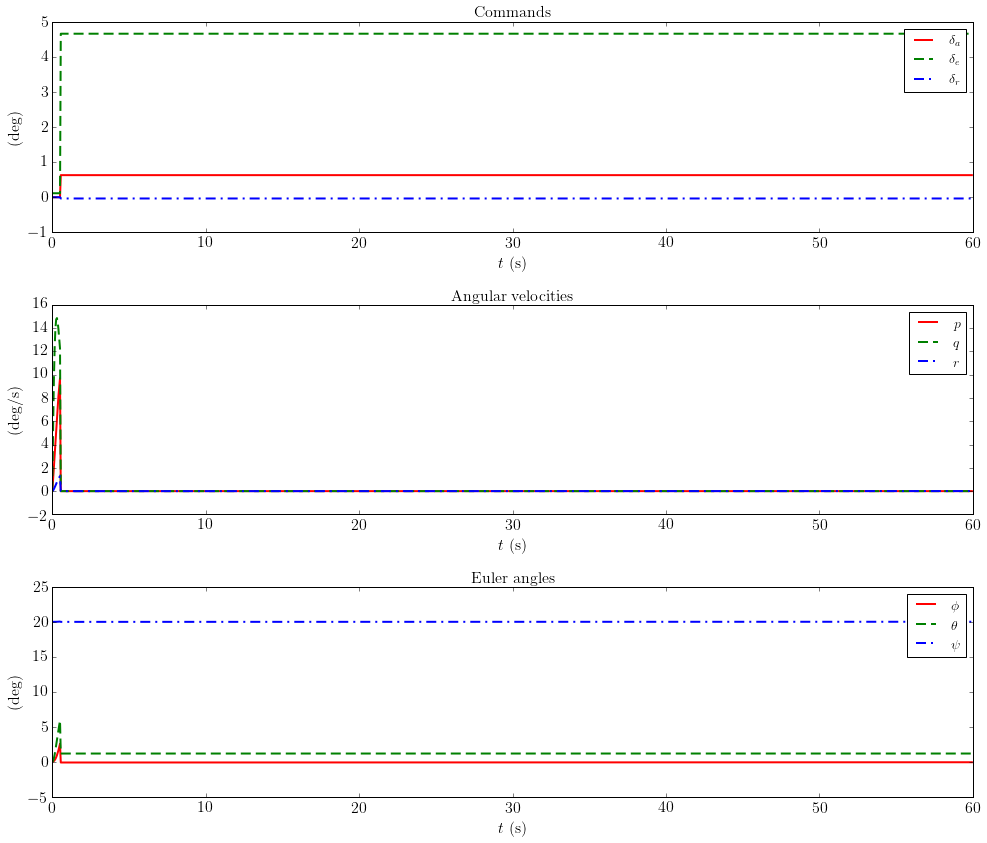

In [10]:
# retrieve data
data_fcs = np.genfromtxt('{0}/c172_fcs.csv'.format(folder_A), delimiter=',', skip_header=1)
data_velocities = np.genfromtxt('{0}/c172_velocities.csv'.format(folder_A), delimiter=',', skip_header=1)
data_attitude = np.genfromtxt('{0}/c172_attitude.csv'.format(folder_A), delimiter=',', skip_header=1)
# plot data
plot_Cmd_AngVel_EulerAng(data_fcs, data_velocities, data_attitude)

### Elevator doublet

Let us now add an elevator doublet starting at $t=5\,\text{s}$.

In [11]:
!JSBSim.exe --script=scripts/c172_elevator_doublet_B.xml > c172_elevator_doublet_B.log


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


Let us move the result in a separate directory:

In [12]:
folder_B = 'c172_elevator_doublet/B'
move_files_to_folder('*.csv', folder_B)

c172_accelerations.csv --> c172_elevator_doublet/B/c172_accelerations.csv
c172_aero.csv --> c172_elevator_doublet/B/c172_aero.csv
c172_attitude.csv --> c172_elevator_doublet/B/c172_attitude.csv
c172_fcs.csv --> c172_elevator_doublet/B/c172_fcs.csv
c172_forces.csv --> c172_elevator_doublet/B/c172_forces.csv
c172_position.csv --> c172_elevator_doublet/B/c172_position.csv
c172_propulsion.csv --> c172_elevator_doublet/B/c172_propulsion.csv
c172_standard.csv --> c172_elevator_doublet/B/c172_standard.csv
c172_velocities.csv --> c172_elevator_doublet/B/c172_velocities.csv


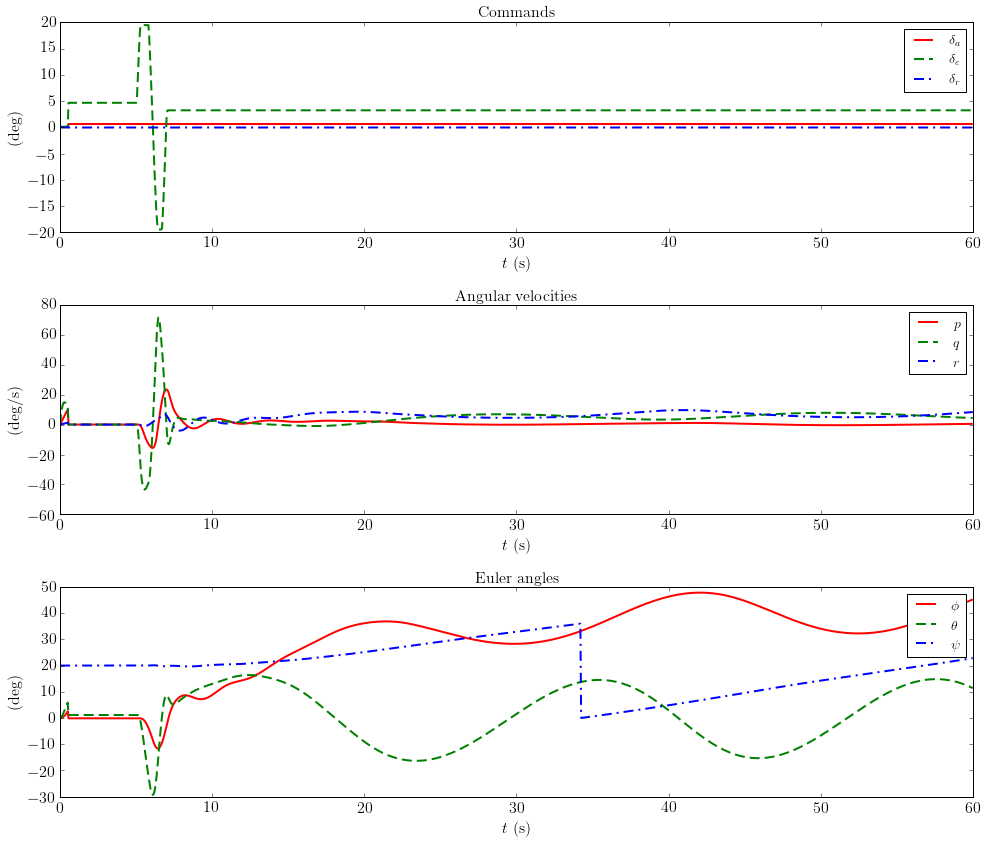

In [13]:
# retrieve data
data_fcs = []
data_fcs = np.genfromtxt('{0}/c172_fcs.csv'.format(folder_B), delimiter=',', skip_header=1)
data_velocities = []
data_velocities = np.genfromtxt('{0}/c172_velocities.csv'.format(folder_B), delimiter=',', skip_header=1)
data_attitude = []
data_attitude = np.genfromtxt('{0}/c172_attitude.csv'.format(folder_B), delimiter=',', skip_header=1)
# plot data
plot_Cmd_AngVel_EulerAng(data_fcs, data_velocities, data_attitude)

### Elevator doublet and wing leveler

The elevator doublet starts at $t=5\,\text{s}$ and terminates $t=7\,\text{s}$. Due to the complexities of the 6DoF flight dynamics model, the aircraft response develops into a right turn, with the bank angle $\phi$ oscillating around a value of $40\,\text{deg}$.

Let us now trigger the *wing leveler* feature implemented into the autopilot.

In [14]:
!JSBSim.exe --script=scripts/c172_elevator_doublet_C.xml > c172_elevator_doublet_C.log


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


Let us move the result in a separate directory:

In [15]:
folder_C = 'c172_elevator_doublet/C'
move_files_to_folder('*.csv', folder_C)

c172_accelerations.csv --> c172_elevator_doublet/C/c172_accelerations.csv
c172_aero.csv --> c172_elevator_doublet/C/c172_aero.csv
c172_attitude.csv --> c172_elevator_doublet/C/c172_attitude.csv
c172_fcs.csv --> c172_elevator_doublet/C/c172_fcs.csv
c172_forces.csv --> c172_elevator_doublet/C/c172_forces.csv
c172_position.csv --> c172_elevator_doublet/C/c172_position.csv
c172_propulsion.csv --> c172_elevator_doublet/C/c172_propulsion.csv
c172_standard.csv --> c172_elevator_doublet/C/c172_standard.csv
c172_velocities.csv --> c172_elevator_doublet/C/c172_velocities.csv


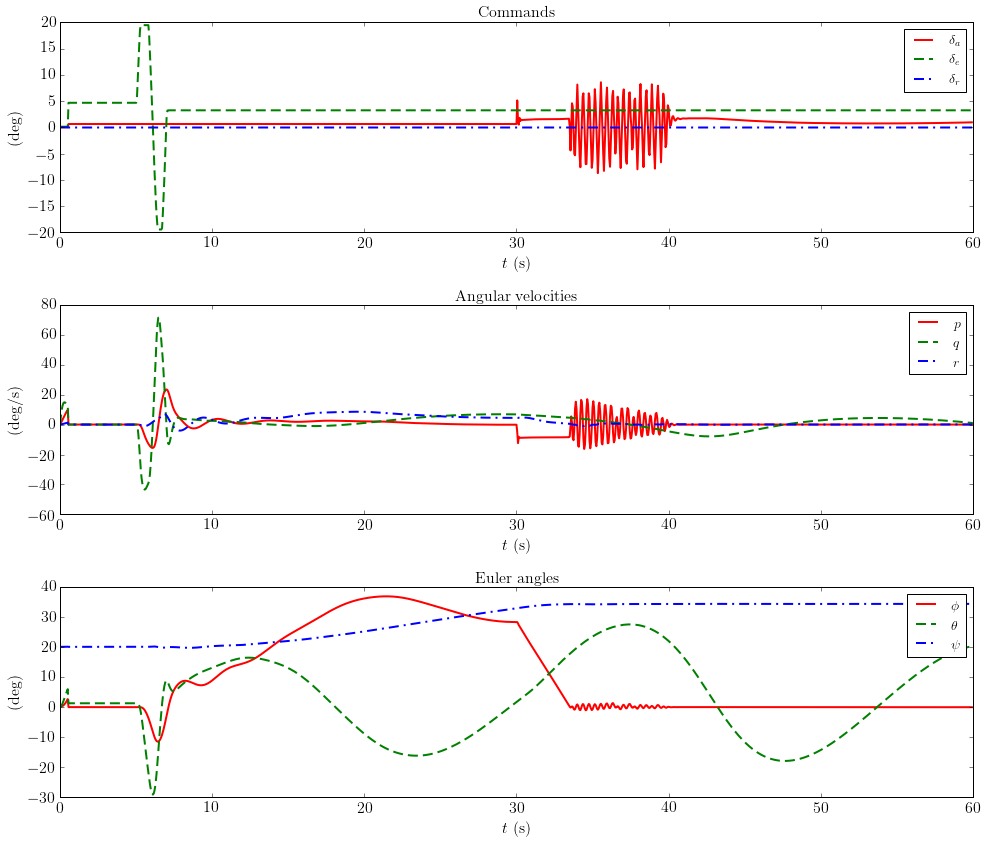

In [16]:
# retrieve data
data_fcs = []
data_fcs = np.genfromtxt('{0}/c172_fcs.csv'.format(folder_C), delimiter=',', skip_header=1)
data_velocities = []
data_velocities = np.genfromtxt('{0}/c172_velocities.csv'.format(folder_C), delimiter=',', skip_header=1)
data_attitude = []
data_attitude = np.genfromtxt('{0}/c172_attitude.csv'.format(folder_C), delimiter=',', skip_header=1)
# plot data
plot_Cmd_AngVel_EulerAng(data_fcs, data_velocities, data_attitude)

As you can see, when the wing leveler logic is triggered — i.e. the aileron deflection $\delta_a$ is set to work in order reach the desired condition of wings bank angle $\phi=0$ — the heading angle $\psi$ becomes constant and anly the pitch dynamics remains. The latter is a low frequency oscillation in pitch which is known as *phugoid* dynamics (or long period dynamics).

# To be continued ...